In [1]:
#imports
%load_ext autoreload
%autoreload 2
import json
import numpy as np
import pandas as pd
import parse_data.prepare_data as prepare_data
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import data_extraction.get_indices as get_indices
import plotting.plot_trajectory as plot_trajectory
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import globals
import scipy
import math
import parse_data.preprocess as preprocess
import flip_rotate_headangle_functions
import headangle_bin_assignment
import headangle_bin_assignment_new
import headangle_analysis_plotting_functions
import analysis.loser_inferred_choice as loser_inferred_choice
import analysis.wall_choice as wall_choice
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import matplotlib.cm as cm

In [90]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis'

json_filenames_all_social = [r'Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json',
                                r'Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json', 
                                r'Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json', 
                                r'Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json', 
                                r'Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json',
                                r'Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json', 
                                r'Json_data/2024-11-19_14-24-49_AmyXinyuanSocial.json', 
                                r'Json_data/2024-09-27_14-25-20_SaraEmilySocial.json', 
                                r'Json_data/2024-11-13_15-28-07_YichuanHoiSocial.json', 
                                r'Json_data/2024-11-20_15-16-21_SunnyVinceSocial.json', 
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSocial.json', 
                                r'Json_data/2024-11-12_15-23-24_FrancescaSenSzeSocial.json', 
                                r'Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json', 
                                r'Json_data/2024-09-13_11-31-00_YansuJerrySocial.json', 
                                r'Json_data/2024-11-20_14-17-44_JasonRahulSocial.json']
 
json_filenames_all_solo = [r'Json_data/2024-12-20_17-36-54_ChristopherFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-39_MarcoFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-33_YeungSecondSolo.json',
                                r'Json_data/2024-11-12_15-44-54_FrancescaSecondSolo.json',
                                r'Json_data/2024-11-12_15-11-45_SenFirstSolo.json',
                                r'Json_data/2024-11-20_15-39-49_VinceSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-18_AmyFirstSolo.json',
                                r'Json_data/2024-11-12_15-45-35_SenSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json',
                                r'Json_data/2024-11-13_15-21-50_HoiFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-37_YansuFirstSolo.json',
                                r'Json_data/2024-11-13_15-22-20_YichuanFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-17_VinceFirstSolo.json',
                                r'Json_data/2025-01-15_16-14-40_YuChunFirstSolo.json',
                                r'Json_data/2024-11-12_13-18-59_WendyFirstSolo.json',
                                r'Json_data/2024-10-17_14-51-22_AbigailSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-56_JerrySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-42_EmilyFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-20_WendySecondSolo.json',
                                r'Json_data/2025-01-15_15-46-04_MarcoSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-50_AbigailFirstSolo.json',
                                r'Json_data/2024-11-13_15-51-39_YichuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-41-56_RahulSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-28_ShamirFirstSolo.json',
                                'Json_data/2025-01-15_15-47-11_YixuanSecondSolo.json',
                                r'Json_data/2024-11-19_15-15-53_SophiaFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-37_RuiqingSecondSolo.json',
                                r'Json_data/2024-11-20_15-40-08_SunnySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-31_SaraFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-46_EmilySecondSolo.json',
                                r'Json_data/2024-11-12_13-19-22_KhadijaFirstSolo.json',
                                r'Json_data/2024-11-12_15-13-34_FrancescaFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-53_SophiaSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-33_RahulFirstSolo.json',
                                r'Json_data/2024-10-17_14-50-03_ShamirSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-34_YansuSecondSolo.json',
                                r'Json_data/2024-10-17_17-12-29_ElsaSecondSolo.json',
                                r'Json_data/2024-12-19_15-22-13_YeungFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-58_JingjingSecondSolo.json',
                                r'Json_data/2024-11-13_15-51-16_HoiSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-44_XinyuanFirstSolo.json',
                                r'Json_data/2024-12-20_18-06-44_ChristopherSecondSolo.json',
                                r'Json_data/2024-10-17_16-35-45_ElsaFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-00_SunnyFirstSolo.json',
                                r'Json_data/2024-11-19_14-44-31_XinyuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-06_JasonFirstSolo.json',
                                r'Json_data/2024-12-20_17-36-27_KirtanFirstSolo.json',
                                r'Json_data/2024-10-17_16-36-0_ZimoFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-55_SaraSecondSolo.json',
                                r'Json_data/2024-10-17_17-11-46_ZimoSecondSolo.json',
                                r'Json_data/2024-12-20_18-06-10_KirtanSecondSolo.json',
                                r'Json_data/2025-01-15_16-14-58_RuiqingFirstSolo.json',
                                r'Json_data/2024-11-19_15-14-19_HocineFirstSolo.json',
                                r'Json_data/2024-11-20_14-42-16_JasonSecondSolo.json',
                                r'Json_data/2024-12-19_15-20-18_JingjingFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-50_JerryFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-13_YixuanFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-29_HocineSecondSolo.json',
                                r'Json_data/2024-11-19_14-44-00_AmySecondSolo.json']

json_filename = r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json'



In [200]:
import os

folder_path = "/Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data" 

# List all files in the folder and filter those ending with "Solo.json"
json_files = [f for f in os.listdir(folder_path) if f.endswith("Solo.json")]

print(",\n".join(rf"r'Json_data/{file}'" for file in json_files))

r'Json_data/2024-12-20_17-36-54_ChristopherFirstSolo.json',
r'Json_data/2025-01-15_15-12-39_MarcoFirstSolo.json',
r'Json_data/2024-12-19_15-51-33_YeungSecondSolo.json',
r'Json_data/2024-11-12_15-44-54_FrancescaSecondSolo.json',
r'Json_data/2024-11-12_15-11-45_SenFirstSolo.json',
r'Json_data/2024-11-20_15-39-49_VinceSecondSolo.json',
r'Json_data/2024-11-19_14-18-18_AmyFirstSolo.json',
r'Json_data/2024-11-12_15-45-35_SenSecondSolo.json',
r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json',
r'Json_data/2024-11-13_15-21-50_HoiFirstSolo.json',
r'Json_data/2024-09-13_11-23-37_YansuFirstSolo.json',
r'Json_data/2024-11-13_15-22-20_YichuanFirstSolo.json',
r'Json_data/2024-11-20_15-10-17_VinceFirstSolo.json',
r'Json_data/2025-01-15_16-14-40_YuChunFirstSolo.json',
r'Json_data/2024-11-12_13-18-59_WendyFirstSolo.json',
r'Json_data/2024-10-17_14-51-22_AbigailSecondSolo.json',
r'Json_data/2024-09-13_11-53-56_JerrySecondSolo.json',
r'Json_data/2024-09-27_14-14-42_EmilyFirstSolo.json',
r'Json_data/

In [ ]:
#test list
ds, single_session = prepare_data.prepare_data(data_folder, json_filename)

In [93]:
len(single_session)

28

In [ ]:
#note: 2025-01-15_16-50-37_RuiqingSecondSolo.json - last line deleted (null values)

In [ ]:
dfs, solo_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_solo)

In [209]:
len(solo_list)

2119

In [ ]:
#socials
df, trial_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_social)

In [205]:
trial_list = trial_list[1:]  #remove buggy first trial from Sophia-Hocine Social

In [94]:
#filter for specific trials
#cutting trial of index 21 in the KhadjaSecondSolo single_session list and index 355 in solo_list
#short trial not returning thetas - presumably because trajectory is too short to perform head angle smoothing
solo_list = [trial for i, trial in enumerate(solo_list) if i != 355]

#High-Low
trial_list_indices = get_indices.get_trials_trialtype(solo_list, trial_type=globals.HIGH_LOW)
trial_list_HL = [solo_list[i] for i in trial_list_indices]
print(len(trial_list_HL))

#45° wall separation
single_wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list_HL, wall_sep=1)
trial_list_45_HL = [trial_list_HL[i] for i in single_wall_sep_trial_indices]
print(len(trial_list_45_HL))

#90° wall separation
two_wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list_HL, wall_sep=2)
trial_list_90_HL = [trial_list_HL[i] for i in two_wall_sep_trial_indices]
print(len(trial_list_90_HL))

#90° wall separation
four_wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list_HL, wall_sep=4)
trial_list_180_HL = [trial_list_HL[i] for i in four_wall_sep_trial_indices]
print(len(trial_list_180_HL))


1668
690
510
468


In [95]:
#take whole trial list and update yaw & trajectory for both players
#45
updated_trial_list_45 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_45_HL)

In [96]:
#90
updated_trial_list_90 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_90_HL)

In [97]:
#180
updated_trial_list_180 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_180_HL)

In [110]:
#checking head angle and trajectory correspondence
trial_example = trial_list_45_HL[0]
example_trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial_example, player_id=0)
example_headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial_example, player_id=0)

In [ ]:
print(example_trajectory)

In [ ]:
print(example_headangles)

In [113]:
#checking head angle and trajectory correspondence
updated_example = updated_trial_list[0]
updated_trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=updated_example, player_id=0)
updated_headangles = trajectory_vectors.extract_trial_player_headangles(trial=updated_example, player_id=0)


In [ ]:
print(updated_trajectory)

In [ ]:
print(updated_headangles)

In [118]:
#plotting updated headangles to check logic
trial_player_headangles = trajectory_headangle.get_player_headangle_vectors_for_trial(example_headangles)
trial_player_headangles_smoothed = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(example_headangles, window_size=5, debug=False)
trajectory = example_trajectory

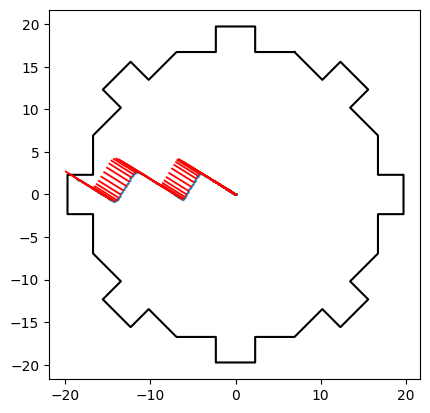

In [119]:
## Find the average head angle vector at all points throughout trajectory 
ax = plot_octagon.plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

for time_index in range(0, trial_player_headangles_smoothed.shape[1],3):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = trial_player_headangles_smoothed[0,time_index]
    y_gradient = trial_player_headangles_smoothed[1,time_index]
    vector_length = 3
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_head_angle_vector_coordinates = np.array(list(zip(start,end)))
    ax.plot(this_head_angle_vector_coordinates[0,:], this_head_angle_vector_coordinates[1,:], c='r', linewidth=1.3)


In [120]:
#temporarily cutting trial returning math error - value is outside of valid cosine function range for cosine similarity
updated_trial_list_45_test = [trial for i, trial in enumerate(updated_trial_list_45) if i != 401]
trial_list_45_test = [trial for i, trial in enumerate(trial_list_45_HL) if i != 401]

In [121]:
#temporarily cutting invalid trial for thetas (short trajectory)
updated_trial_list_90_test = [trial for i, trial in enumerate(updated_trial_list_90) if i != 251]
trial_list_90_test = [trial for i, trial in enumerate(trial_list_90_HL) if i != 251]


In [ ]:
#test new bin functions
bins = []
for trial_index in range(len(updated_trial_list_180)):
    bins_test = headangle_bin_assignment_new.sort_head_angle_into_bin(updated_trial_list_180, trial_index, debug=True)
    print(f"trial {trial_index}: {bins_test}")
    bins.append(bins_test)

In [117]:
len(bins)

468

In [103]:
#bin assignments for the whole trial list
#45
bin_assignments_45 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_45_test)

In [ ]:
bins_45_player0 = bin_assignments_45
print(bins_45_player0)

In [113]:
#90
bin_assignments_90 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_90_test)

In [ ]:
bins_90_player0 = bin_assignments_90
len(bins_90_player0)

In [118]:
#180
bin_assignments_180 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_180)

In [ ]:
bins_180_player0 = bin_assignments_180
len(bins_180_player0)

In [ ]:
#get player wall choices from original trial list for both losses and wins
#45
choice_45_player0 = wall_visibility_and_choice.get_player_wall_choice(trial_list_45_test, 0, inferred_choice=False, debug=True)

In [ ]:
#90
choice_90_player0 = wall_visibility_and_choice.get_player_wall_choice(trial_list_90_test, 0, inferred_choice=False, debug=True)

In [ ]:
#180
choice_180_player0 = wall_visibility_and_choice.get_player_wall_choice(trial_list_180_HL, 0, inferred_choice=False, debug=True)

In [140]:
#check whether high wall was chosen
#45
high_wall_chosen_45_player0 = get_indices.was_given_wall_chosen(trial_list_45_test, choice_45_player0, 0)

In [141]:
high_wall_chosen_90_player0 = get_indices.was_given_wall_chosen(trial_list_90_test, choice_90_player0, 0)

In [142]:
high_wall_chosen_180_player0 = get_indices.was_given_wall_chosen(trial_list_180_HL, choice_180_player0, 0)

In [ ]:
#45

In [144]:
#obtain ratios for how many times a given player chose high given their head angle bin at slice onset
from collections import defaultdict

#creating dictionaries to store the counts
bin_total_counts_45 = defaultdict(int)
bin_true_counts_45 = defaultdict(int)

#match bin assignments to high wall chosen lists
trial_data_45 = [(bins_45_player0, high_wall_chosen_45_player0)]

for bin_assignments, high_wall_chosen in trial_data_45:

    for bin_index, is_high_wall_chosen in zip(bin_assignments, high_wall_chosen):

        if np.isnan(is_high_wall_chosen):
            continue
            
        bin_total_counts_45[bin_index] += 1
        
        if is_high_wall_chosen:
            
            bin_true_counts_45[bin_index] += 1

#calculate probabilities
probabilities_45 = {bin_index: bin_true_counts_45[bin_index] / bin_total_counts_45[bin_index]
                        for bin_index in sorted(bin_total_counts_45)}

#convert the dictionary to a list of values
#bin_probabilities_list_45 = list(probabilities_45.values())

#order by bin index
probabilities_list_45 = [probabilities_45[bin_index] for bin_index in sorted(bin_total_counts_45)]

print(probabilities_list_45)

#print the results
for bin_index, probability in sorted(probabilities_45.items()):
    print(f"Bin {bin_index}: {probability:.2f} (True/Total = {bin_true_counts_45[bin_index]}/{bin_total_counts_45[bin_index]})")


[0.9368421052631579, 0.9259259259259259, 0.8222222222222222, 0.8311688311688312, 0.9113924050632911, 0.9363636363636364, 0.9358974358974359, 0.9493670886075949]
Bin 1: 0.94 (True/Total = 89/95)
Bin 2: 0.93 (True/Total = 75/81)
Bin 3: 0.82 (True/Total = 74/90)
Bin 4: 0.83 (True/Total = 64/77)
Bin 5: 0.91 (True/Total = 72/79)
Bin 6: 0.94 (True/Total = 103/110)
Bin 7: 0.94 (True/Total = 73/78)
Bin 8: 0.95 (True/Total = 75/79)


In [ ]:
#90

In [145]:
#obtain ratios for how many times a given player chose high given their head angle bin at slice onset
from collections import defaultdict

#creating dictionaries to store the counts
bin_total_counts_90 = defaultdict(int)
bin_true_counts_90 = defaultdict(int)

#match bin assignments to high wall chosen lists
trial_data_90 = [(bins_90_player0, high_wall_chosen_90_player0)]

for bin_assignments, high_wall_chosen in trial_data_90:

    for bin_index, is_high_wall_chosen in zip(bin_assignments, high_wall_chosen):

        if np.isnan(is_high_wall_chosen):
            continue
            
        bin_total_counts_90[bin_index] += 1
        
        if is_high_wall_chosen:
            
            bin_true_counts_90[bin_index] += 1

#calculate probabilities
probabilities_90 = {bin_index: bin_true_counts_90[bin_index] / bin_total_counts_90[bin_index]
                        for bin_index in sorted(bin_total_counts_90)}

#convert the dictionary to a list of values
#bin_probabilities_list_45 = list(probabilities_45.values())

#order by bin index
probabilities_list_90 = [probabilities_90[bin_index] for bin_index in sorted(bin_total_counts_90)]

print(probabilities_list_90)

#print the results
for bin_index, probability in sorted(probabilities_90.items()):
    print(f"Bin {bin_index}: {probability:.2f} (True/Total = {bin_true_counts_90[bin_index]}/{bin_total_counts_90[bin_index]})")


[0.9642857142857143, 0.9516129032258065, 0.7352941176470589, 0.6438356164383562, 0.7457627118644068, 0.8148148148148148, 0.84375, 0.9178082191780822]
Bin 1: 0.96 (True/Total = 54/56)
Bin 2: 0.95 (True/Total = 59/62)
Bin 3: 0.74 (True/Total = 50/68)
Bin 4: 0.64 (True/Total = 47/73)
Bin 5: 0.75 (True/Total = 44/59)
Bin 6: 0.81 (True/Total = 44/54)
Bin 7: 0.84 (True/Total = 54/64)
Bin 8: 0.92 (True/Total = 67/73)


In [ ]:
#180

In [146]:
#obtain ratios for how many times a given player chose high given their head angle bin at slice onset
from collections import defaultdict

#creating dictionaries to store the counts
bin_total_counts_180 = defaultdict(int)
bin_true_counts_180 = defaultdict(int)

#match bin assignments to high wall chosen lists
trial_data_180 = [(bins_180_player0, high_wall_chosen_180_player0)]

for bin_assignments, high_wall_chosen in trial_data_180:

    for bin_index, is_high_wall_chosen in zip(bin_assignments, high_wall_chosen):

        if np.isnan(is_high_wall_chosen):
            continue
            
        bin_total_counts_180[bin_index] += 1
        
        if is_high_wall_chosen:
            
            bin_true_counts_180[bin_index] += 1

#calculate probabilities
probabilities_180 = {bin_index: bin_true_counts_180[bin_index] / bin_total_counts_180[bin_index]
                        for bin_index in sorted(bin_total_counts_180)}

#convert the dictionary to a list of values
#bin_probabilities_list_45 = list(probabilities_45.values())

#order by bin index
probabilities_list_180 = [probabilities_180[bin_index] for bin_index in sorted(bin_total_counts_180)]

print(probabilities_list_180)

#print the results
for bin_index, probability in sorted(probabilities_180.items()):
    print(f"Bin {bin_index}: {probability:.2f} (True/Total = {bin_true_counts_180[bin_index]}/{bin_total_counts_180[bin_index]})")


[0.9298245614035088, 0.9464285714285714, 0.803030303030303, 0.5517241379310345, 0.5833333333333334, 0.5555555555555556, 0.9516129032258065, 0.9272727272727272]
Bin 1: 0.93 (True/Total = 53/57)
Bin 2: 0.95 (True/Total = 53/56)
Bin 3: 0.80 (True/Total = 53/66)
Bin 4: 0.55 (True/Total = 32/58)
Bin 5: 0.58 (True/Total = 35/60)
Bin 6: 0.56 (True/Total = 30/54)
Bin 7: 0.95 (True/Total = 59/62)
Bin 8: 0.93 (True/Total = 51/55)


In [ ]:
#45

In [147]:
#calculate average p(H) regardless of bin

from collections import defaultdict

#initialize counters for the total high wall choices and total trials overall
true_counts_45 = 0
total_counts_45 = 0

#bin assignments and high wall chosen for all trial lists
trial_data_45 = [(bins_45_player0, high_wall_chosen_45_player0)]


#iterate through all provided trial lists
for bin_assignments, high_wall_chosen in trial_data_45:

    #iterate over both lists simultaneously for the current trial list
    for is_high_wall_chosen in high_wall_chosen:

        if np.isnan(is_high_wall_chosen):  
            continue         
        
        total_counts_45 += 1  #increment total trial count for the bin
        
        if is_high_wall_chosen:          #increment True count if high wall is chosen
            true_counts_45 += 1

#calculate the average ratio 
print(true_counts_45)
print(total_counts_45)
overall_probability_45 = true_counts_45 / total_counts_45

print(overall_probability_45)


625
689
0.9071117561683599


In [176]:
#90

In [148]:
#calculate average p(H) regardless of bin

from collections import defaultdict

#initialize counters for the total high wall choices and total trials overall
true_counts_90 = 0
total_counts_90 = 0

#bin assignments and high wall chosen for all trial lists
trial_data_90 = [(bins_90_player0, high_wall_chosen_90_player0)]


#iterate through all provided trial lists
for bin_assignments, high_wall_chosen in trial_data_90:

    #iterate over both lists simultaneously for the current trial list
    for is_high_wall_chosen in high_wall_chosen:

        if np.isnan(is_high_wall_chosen):  
            continue         
        
        total_counts_90 += 1  #increment total trial count for the bin
        
        if is_high_wall_chosen:          #increment True count if high wall is chosen
            true_counts_90 += 1

#calculate the average ratio 
print(true_counts_90)
print(total_counts_90)
overall_probability_90 = true_counts_90/ total_counts_90

print(overall_probability_90)


419
509
0.8231827111984283


In [178]:
#180

In [149]:
#calculate average p(H) regardless of bin

from collections import defaultdict

#initialize counters for the total high wall choices and total trials overall
true_counts_180 = 0
total_counts_180 = 0

#bin assignments and high wall chosen for all trial lists
trial_data_180 = [(bins_180_player0, high_wall_chosen_180_player0)]


#iterate through all provided trial lists
for bin_assignments, high_wall_chosen in trial_data_180:

    #iterate over both lists simultaneously for the current trial list
    for is_high_wall_chosen in high_wall_chosen:

        if np.isnan(is_high_wall_chosen):  
            continue         
        
        total_counts_180 += 1  #increment total trial count for the bin
        
        if is_high_wall_chosen:          #increment True count if high wall is chosen
            true_counts_180 += 1

#calculate the average ratio 
print(true_counts_180)
print(total_counts_180)
overall_probability_180 = true_counts_180 / total_counts_180

print(overall_probability_180)


366
468
0.782051282051282


In [151]:
#obtain difference between p(H) given bin and average p(H)
#45
new_probabilities_list_45 = [probability - overall_probability_45 for probability in probabilities_list_45]
print(new_probabilities_list_45)
#90
new_probabilities_list_90 = [probability - overall_probability_90 for probability in probabilities_list_90]
print(new_probabilities_list_90)
#180
new_probabilities_list_180 = [probability - overall_probability_180 for probability in probabilities_list_180]
print(new_probabilities_list_180)

[0.029730349094797992, 0.018814169757566, -0.08488953394613774, -0.0759429249995287, 0.004280648894931183, 0.02925188019527647, 0.028785679729075975, 0.04225533243923496]
[0.14110300308728596, 0.12843019202737815, -0.08788859355136946, -0.17934709476007216, -0.07741999933402155, -0.008367896383613571, 0.02056728880157166, 0.09462550797965386]
[0.14777327935222673, 0.16437728937728935, 0.020979020979020935, -0.23032714412024757, -0.19871794871794868, -0.22649572649572647, 0.16956162117452445, 0.1452214452214452]


(2, 8)


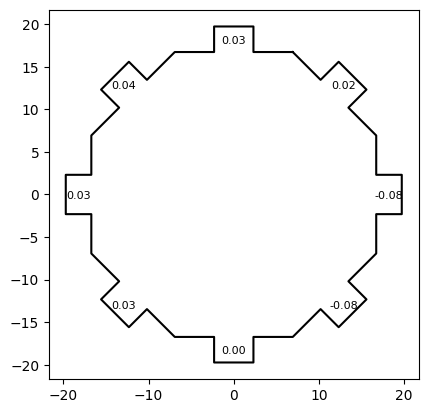

In [152]:
#45
import matplotlib.pyplot as plt

#plot octagon with new ratios list 
ax = plot_octagon.plot_octagon()

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_45)

plt.show()


(2, 8)


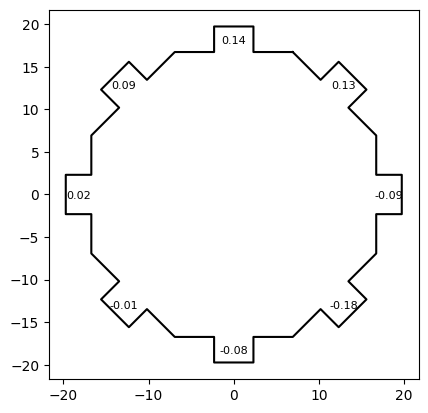

In [153]:
#90
import matplotlib.pyplot as plt

#plot octagon with new ratios list 
ax = plot_octagon.plot_octagon()

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_90)

plt.show()


(2, 8)


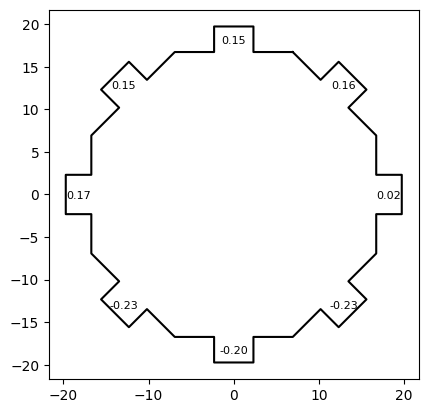

In [154]:
#180
import matplotlib.pyplot as plt

#plot octagon with new ratios list 
ax = plot_octagon.plot_octagon()

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_180)

plt.show()


In [155]:
bin_ranges = headangle_bin_assignment.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


(2, 8)


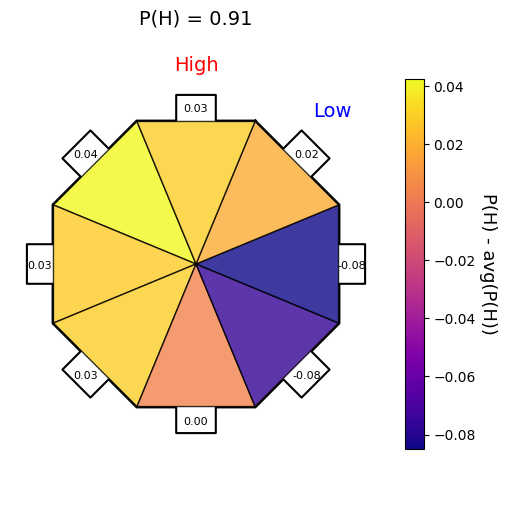

[0.029730349094797992, 0.018814169757566, -0.08488953394613774, -0.0759429249995287, 0.004280648894931183, 0.02925188019527647, 0.028785679729075975, 0.04225533243923496]


In [160]:
#45
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
#probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list_45)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_45)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list_45), vmin=min(new_probabilities_list_45)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_prob_45 = round(overall_probability_45, 2)
plt.title(f"P(H) = {rounded_prob_45}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list_45)

(2, 8)


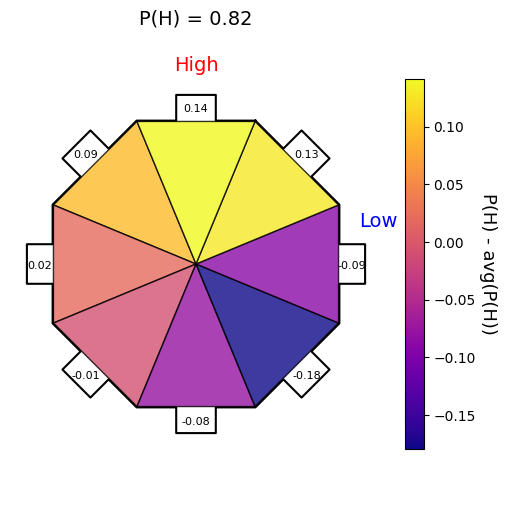

[0.14110300308728596, 0.12843019202737815, -0.08788859355136946, -0.17934709476007216, -0.07741999933402155, -0.008367896383613571, 0.02056728880157166, 0.09462550797965386]


In [162]:
#90
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
#probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list_90)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_90)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center3_x, alcove_center3_y = alcove_centers[:,2]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center3_x + 3, alcove_center3_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list_90), vmin=min(new_probabilities_list_90)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_prob_90 = round(overall_probability_90, 2)
plt.title(f"P(H) = {rounded_prob_90}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list_90)

(2, 8)


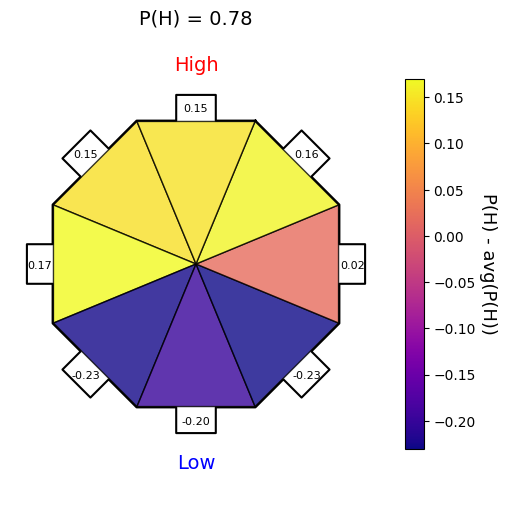

[0.14777327935222673, 0.16437728937728935, 0.020979020979020935, -0.23032714412024757, -0.19871794871794868, -0.22649572649572647, 0.16956162117452445, 0.1452214452214452]


In [163]:
#180
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
#probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list_180)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_180)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center4_x, alcove_center4_y = alcove_centers[:,4]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center4_x, alcove_center4_y - 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list_180), vmin=min(new_probabilities_list_180)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_prob_180 = round(overall_probability_180, 2)
plt.title(f"P(H) = {rounded_prob_180}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list_180)